In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

There are 42 objects and 1 float64 datatype available in this dataset

In [4]:
df.shape

(571, 43)

There are 571 rows and 43 coloumns including target column avalable in this dataset

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are lots of null values present in this dataset and need to address this null values

In [6]:
df.head(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [7]:
#column name 'Seat No.' I thing is not contributing to the target so I am deleting this coloumn
df=df.drop('Seat No.', axis=1)

In [8]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [9]:
#Checking the unique value in every columns.
for i in df.columns:
    print(df[i].unique(),"\n")

['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F'] 

['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F'] 

['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F'] 

['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F'] 

['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU'] 

['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D'] 

['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU'] 

['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' nan 'A+' 'WU' 'F'] 

['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' nan 'A+'] 

['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' nan 'F' 'A+'] 

['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' nan 'A+' 'I' 'WU' 'F'] 

['B+' 'C+' 'A-' 'B' 'A' 'B-' nan 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F'] 

['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' nan 'C-' 'WU' 'F' 'A+' 'W'] 

['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' nan 'C' 'W' 'A+' 'D' 'F'] 

['B-' 'D+' 'A' 'D' 'A-' 'C-' 'C' 'B+' 'C+' 'B' nan 'A+' 'WU' 'W' 'F'] 


In [10]:
col=['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','MT-442','EL-332','CS-318','CS-306','CS-312','CS-317','CS-403','CS-421','CS-406','CS-414','CS-419','CS-423','CS-412']

In [11]:
#Filling the null values by mode method.
for i in col:
    df[i]=df[i].fillna(value=(df[i].mode()[0]))

In [12]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [14]:
#Converting categorical data to numberical data by using Label Encoder
for i in col:
    df1=lab_enc.fit_transform(df[i])
    df[i]=df1

In [15]:
for i in df.columns:
    print(df[i].unique(),"\n")

[ 5  0  9  2  4  3  7  6  8 10 12  1 11] 

[10  9  3  7  2  5  8  4  6  0  1 11] 

[ 8 10  0  2  3  7  4  5  6  9 12  1 11] 

[ 6  9  5  4 10  3  8  7  2  0 12  1 11] 

[ 8  5  4  9  0  7  2  6  3 10  1 11 12] 

[10  6  0  2  3  5  4  7  8  1  9] 

[ 9  5 10  2  7  0  8  6  3  4  1 11 12] 

[ 8  0  4  3  2  5  6  7 10  9  1 12 11] 

[ 5 10  2  9  0  4  3  8  7  6 11  1] 

[ 8  9  2  7  4  0 10  6  3  5 12 11  1] 

[ 8  4  5  9  6  2  7 10  3  0  1 12 13 11] 

[ 4  7  2  3  0  5  9 12  1  6 10  8 11] 

[ 9  5  0 10  6  4  2  3  7  8 13 11  1 12] 

[ 2  8  0  5  4  7 10  3  6 12  1  9 11] 

[ 5 10  0  9  2  8  6  4  7  3  1 13 12 11] 

[ 7 10  0  6  2  4  5  3  9  1  8 13 12 11] 

[10  9  1  4  5  3  2  8  7  6  0 13 11 12] 

[10  6  0  7  2  4  3  5  8  9  1 12 11] 

[ 9  2  3  6  5  7  0  8  4 10 12 11  1] 

[ 0  5 10  2  1  6  4  3  8  9 12 11  7] 

[ 9  6  2  7  5 10  4  3  0  8  1 11] 

[ 8  9  0  2  7  6  4  5 10  3  1 13 12 11] 

[ 6 10  0  7  4  2  3  5  1  9  8 11] 

[ 7  8  6  

In [16]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [17]:
#checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print(("\n"))

2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: PH-121, dtype: int64


2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: HS-101, dtype: int64


0     178
2     120
4      50
3      49
5      42
9      31
1      31
6      19
7      17
8      16
10     14
12      3
11      1
Name: CY-105, dtype: int64


0     97
2     75
4     70
3     57
9     45
6     41
5     40
7     39
8     36
10    34
1     34
12     2
11     1
Name: HS-105/12, dtype: int64


2     107
0     100
5      70
4      62
3      55
8      39
7      33
6      30
9      26
1      23
10     21
12      3
11      2
Name: MT-111, dtype: int64


0     151
2     134
4      60
3      51
1      43
5      38
7      23
6      22
8      22
10     15
9      12
Name: CS-105, dtype: int64


2     118
4     101
3      96
0      56
5      54
7      41
10     29
8      27
9      24
6      1

In [18]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


Every column has same number of values
I can see there are difference between Mean values and 50% values in some columns. It means there is outliers present.
I will find the outliers by using distplot and boxplot graph

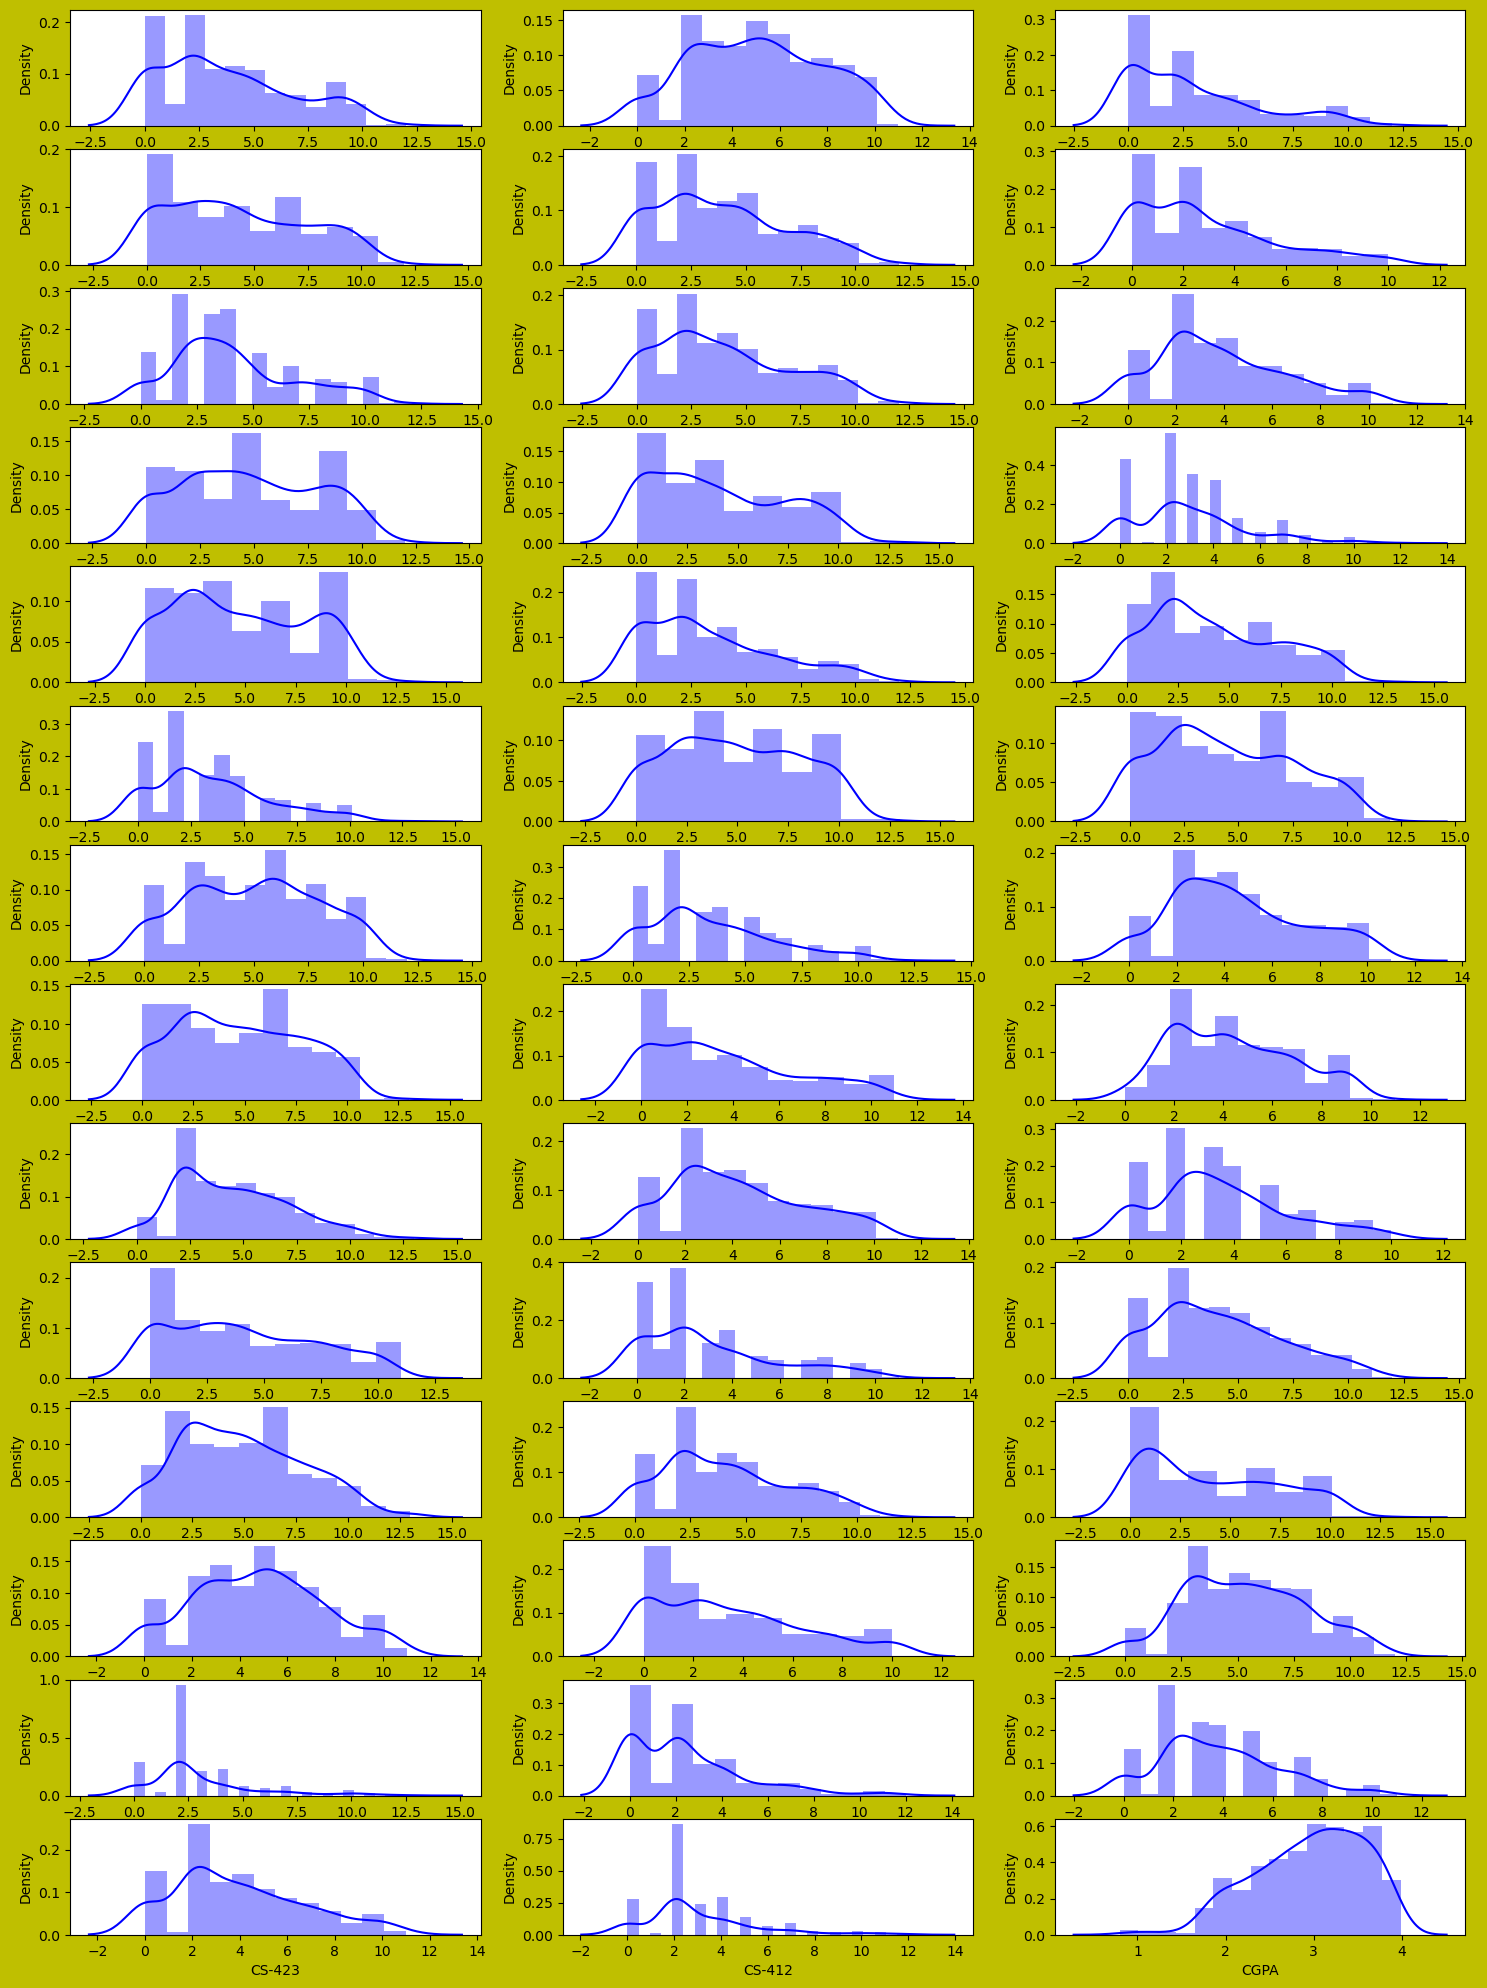

In [19]:
plt.figure(figsize=(18,25), facecolor='y')
plotnumber=1

for i in df:
    if plotnumber<=45:
        ax=plt.subplot(14,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

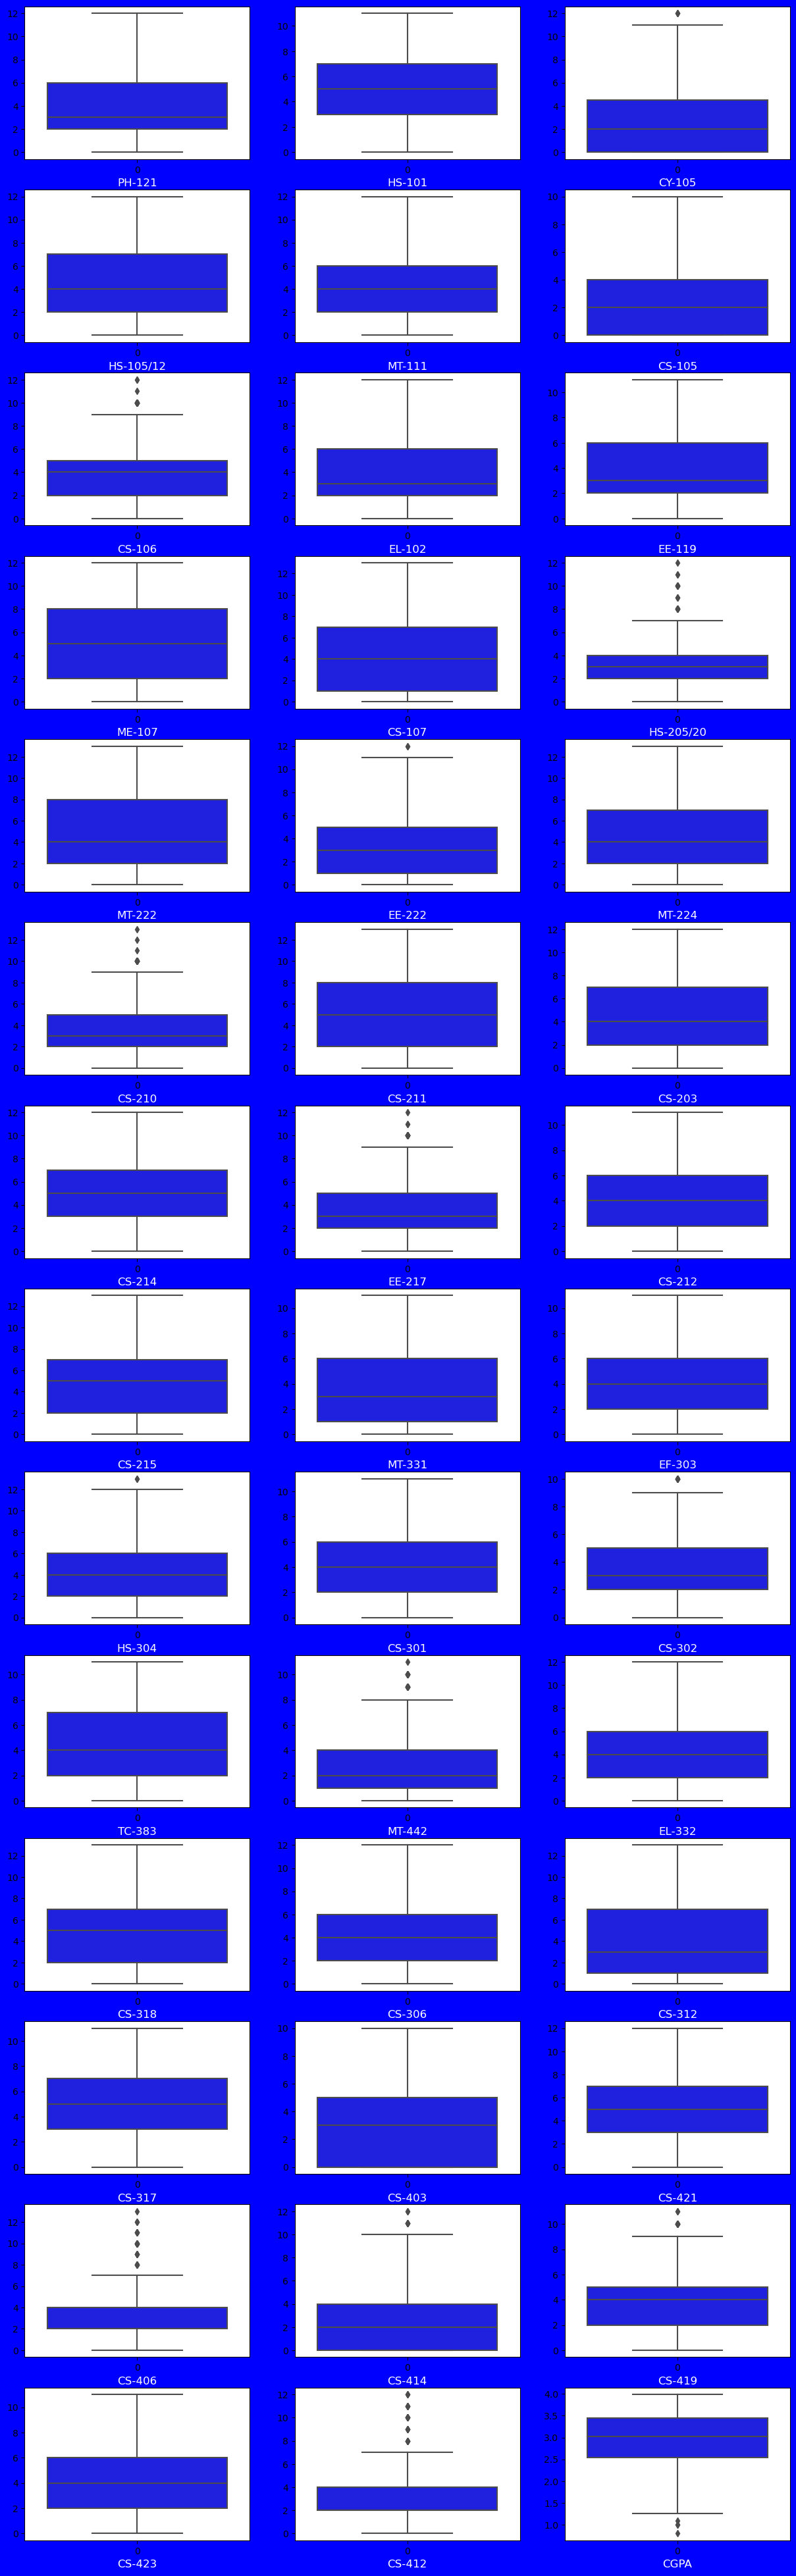

In [20]:
plt.figure(figsize=(15,50), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=45:
        ax=plt.subplot(14,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=12, color='w')
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

There are some outliers present in some columns. So, I will remove this outliers by using Zscore technique.

In [21]:
from scipy.stats import zscore

In [22]:
z_score=zscore(df[['CS-106','HS-205/20','CS-210','EE-217','MT-442','CS-406','CS-414','CS-419','CS-412']])

In [23]:
abs_z_score=np.abs(z_score)

In [24]:
filter_entry=(abs_z_score<3).all(axis=1)

In [25]:
df=df[filter_entry]

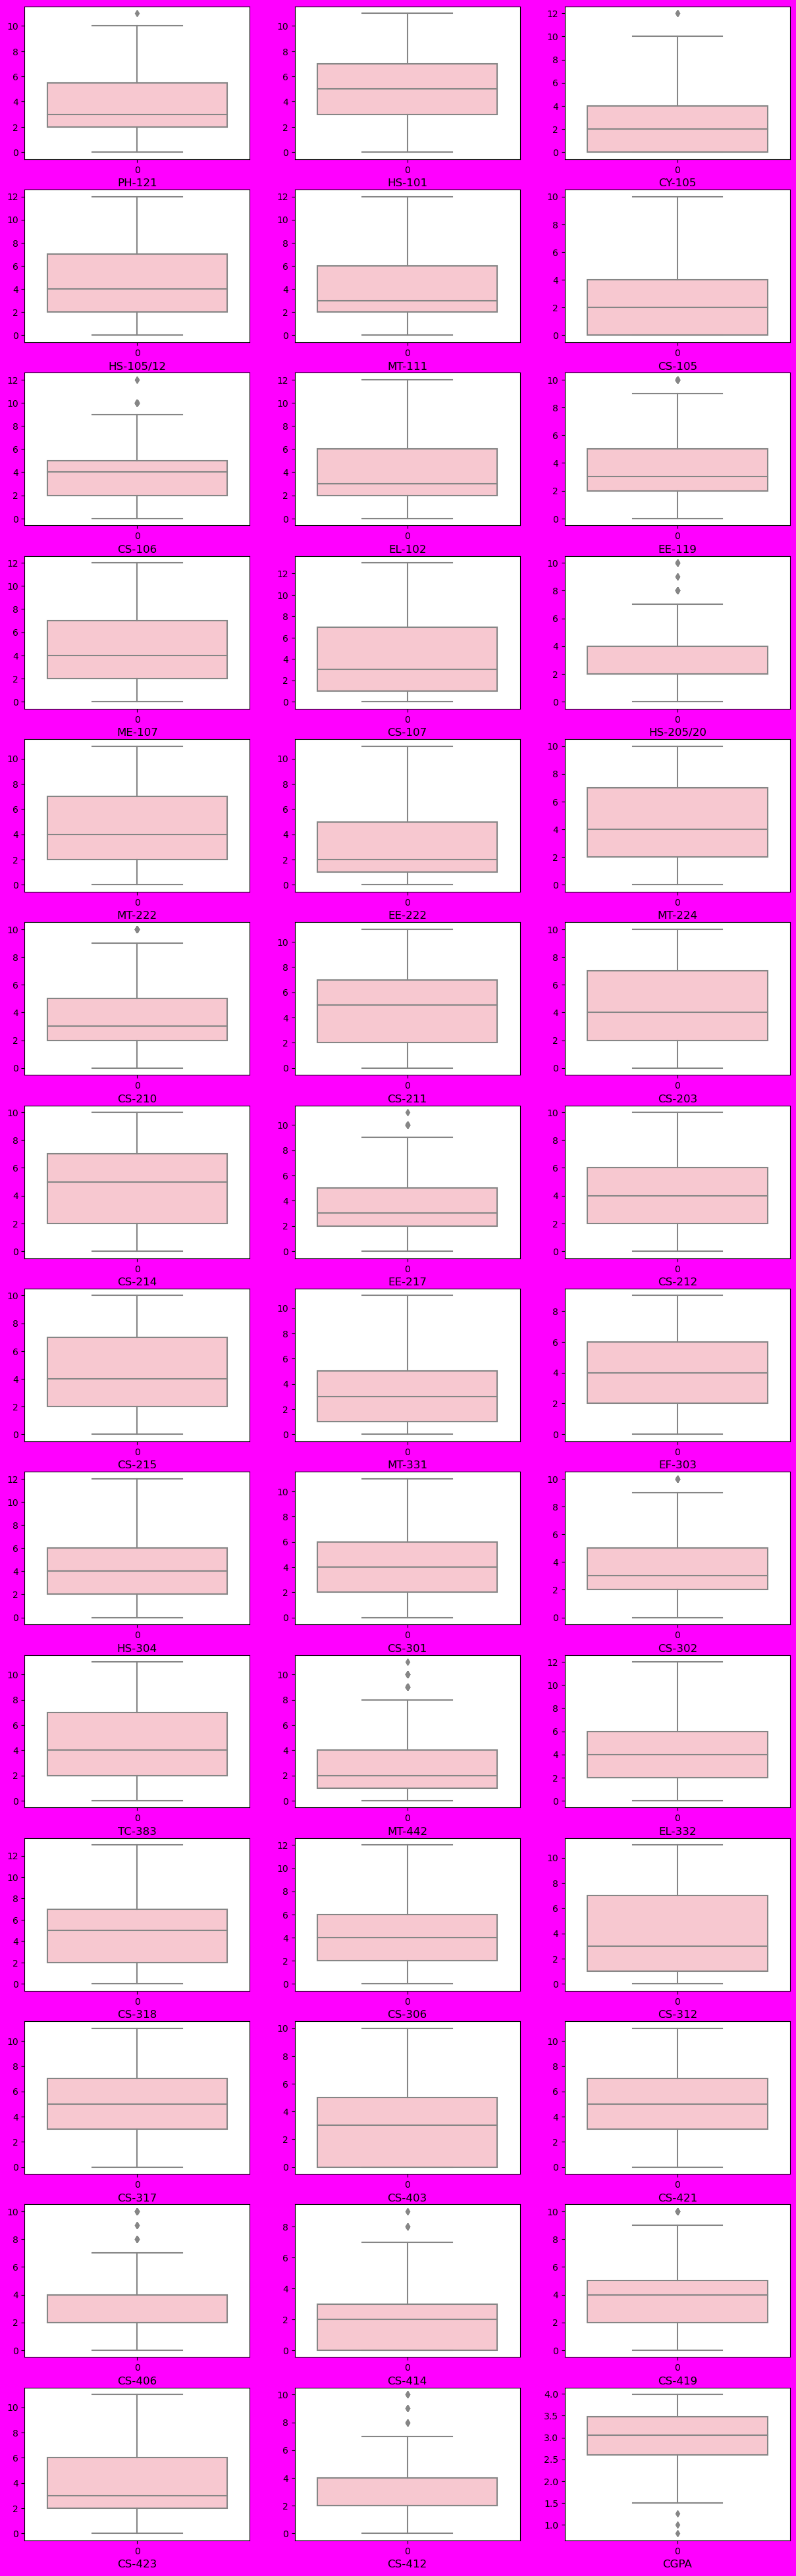

In [26]:
plt.figure(figsize=(15,50), facecolor='magenta')
plotnumber=1

for i in df:
    if plotnumber<=45:
        ax=plt.subplot(14,3,plotnumber)
        sns.boxplot(df[i], color='pink')
        plt.xlabel(i, fontsize=12, color='black')
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

After applying Zscore technique, I have removed outliers in some column successfully 

In [27]:
#Dividing independent and dependent columns in to two variables i.e. x & y.
x=df.drop('CGPA', axis=1)
y=df.CGPA

In [28]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [29]:
x_scaled=scalar.fit_transform(x)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#Checking if there is any multicollinearity problem in columns by using VIF technique.
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,2.758111,PH-121
1,1.810707,HS-101
2,2.455121,CY-105
3,2.361360,HS-105/12
4,2.657995,MT-111
5,2.353903,CS-105
6,1.977370,CS-106
7,1.918125,EL-102
8,2.156168,EE-119
9,2.296296,ME-107


I think there is no any multicollinearity problem in these columns. Now I am going to build the Regression model building.

In [32]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
mxacc=0
mxrs=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>mxacc:
        mxacc=acc
        mxrs=i
print("Best Accuracy score is :", mxacc, "at Random_state :", mxrs)

Best Accuracy score is : 0.9694545874001312 at Random_state : 55


In [34]:
 x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.30, random_state=i)

In [35]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'R2 Score:{r2_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'R2 Score:{r2_score(y_test,ypred)*100:2f}%')
            
        print("\nMean Absolute Error:", mean_absolute_error(y_test,ypred))
        print("\nMean Squared Error:", mean_squared_error(y_test,ypred))
        print("\nRoot Mean Squared Error:", np.sqrt(mean_squared_error(y_test,ypred)))

In [40]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
lso=Lasso()
rdg=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gbr=GradientBoostingRegressor()

In [41]:
models={'RandomForestRegressor':rfr,'DecisionTreeRegressor':dtr,'KNN':knn,'Lasso':lso,'Ridge':rdg,'ExtraTreesRegressor':etr,'SVR':svr,'GradientBoostingRegressor':gbr}

In [42]:
#Now I am training all models by using for look.
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Model Name is :', name)
    metric_score(model,x_train, x_test, y_train, y_test, train=True)
    metric_score(model,x_train, x_test, y_train, y_test, train=False)
    print('\n')

Model Name is : RandomForestRegressor

===============================train result==============
R2 Score:98.404748%

===============================test result==============
R2 Score:93.127081%

Mean Absolute Error: 0.10675546012269929

Mean Squared Error: 0.022712932836809772

Root Mean Squared Error: 0.15070810474825092


Model Name is : DecisionTreeRegressor

===============================train result==============
R2 Score:100.000000%

===============================test result==============
R2 Score:79.793860%

Mean Absolute Error: 0.20056441717791412

Mean Squared Error: 0.06677522699386503

Root Mean Squared Error: 0.2584090304030899


Model Name is : KNN

===============================train result==============
R2 Score:92.240118%

===============================test result==============
R2 Score:92.016748%

Mean Absolute Error: 0.09532638036809818

Mean Squared Error: 0.02638224957055216

Root Mean Squared Error: 0.1624261357373011


Model Name is : Lasso

=================

Except Lasso model each model has givin good score. So, I am checking Cross validation score in each the model except Lasso.

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [57]:
mdl=[lr,rfr,dtr,knn,rdg,etr,svr,gbr]

In [60]:
#Cheking CV Score by using for loop.
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print(score)
    print(score.mean())
    print("\n")

Model Name is : LinearRegression()
[0.8880504  0.9252994  0.94182609 0.94064567 0.82372162]
0.9039086336634046


Model Name is : RandomForestRegressor()
[0.89792243 0.92605264 0.95200327 0.92009112 0.83014985]
0.9052438614242344


Model Name is : DecisionTreeRegressor()
[0.81198752 0.79422036 0.84888399 0.73821771 0.72035824]
0.7827335640250832


Model Name is : KNeighborsRegressor()
[0.88613881 0.91722777 0.96083507 0.94240432 0.75766022]
0.8928532374328533


Model Name is : Ridge()
[0.8882218  0.92531036 0.94215622 0.94106823 0.82380168]
0.9041116573803789


Model Name is : ExtraTreesRegressor()
[0.89582904 0.95083346 0.95295671 0.96079899 0.86496416]
0.9250764722427682


Model Name is : SVR()
[0.88809917 0.91497617 0.95092151 0.94684334 0.83323769]
0.9068155764266098


Model Name is : GradientBoostingRegressor()
[0.90780123 0.97217396 0.93925816 0.93057952 0.83376796]
0.9167161656595256




I think ExtraTreesRegressor model has given good score than other model So, I doing hyper parameter tuning on this mode and will check the score

In [61]:
from sklearn.model_selection import GridSearchCV

In [68]:
param={'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
      'random_state':[10,50,100],
      'max_depth':[0,10,20],
      'n_jobs':[-2,-1,1],
      'n_estimators':[50,100,200,300]}

In [69]:
gcv=GridSearchCV(etr,param,cv=5)

In [70]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [71]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 100}

In [72]:
final_model=ExtraTreesRegressor(criterion='friedman_mse', max_depth=20,n_estimators=200,n_jobs=2, random_state=100)

In [73]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test, pred)

In [74]:
acc

0.9533745632393811

In [75]:
import joblib
joblib.dump(final_model,'StudentGradesPrediction.pkl')

['StudentGradesPrediction.pkl']